In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
df=pd.read_csv(r"C:\Users\Administrator\Documents\DS_03\outputs\event_feedback.csv")

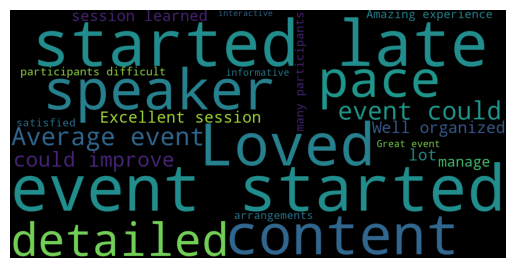

In [19]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Clean column (remove NaN + convert everything to string)
df['Comments'] = df['Comments'].fillna('').astype(str)

# Join into one text
comments = " ".join(df['Comments'])

# Generate wordcloud
wc = WordCloud(
    width=1200,
    height=600,
    stopwords=set(stopwords.words('english'))
).generate(comments)

plt.imshow(wc)
plt.axis("off")
plt.savefig(r"C:\Users\Administrator\Documents\DS_03\outputs\wordcloud.png")
plt.show()


In [11]:
df['comments'].head()
df['comments'].isna().sum()
df['comments'].apply(lambda x: len(str(x))).describe()


count    1001.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: comments, dtype: float64

In [12]:
# remove rows where comments is NaN or empty after strip
df['comments'] = df['comments'].astype(str).str.strip()
df = df[df['comments'].str.len() > 0]

print("Remaining rows:", len(df))


Remaining rows: 0


In [13]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Join text
comments = " ".join(df['comments'].tolist()).strip()

if len(comments) == 0:
    print("❌ No text available for wordcloud. Please check your CSV.")
else:
    wc = WordCloud(
        width=1200,
        height=600,
        stopwords=set(stopwords.words('english'))
    ).generate(comments)

    plt.imshow(wc)
    plt.axis("off")
    plt.show()


❌ No text available for wordcloud. Please check your CSV.


In [15]:
df.head()

,row_id,student_id,well_versed,explains_concepts,presentations,assignment_difficulty,solves_doubts,course_structure,student_support,recommendation,event_name,department,event_type,comments


In [20]:
import re
from collections import Counter

words = re.findall(r'\w+', comments.lower())
filtered = [w for w in words if w not in stopwords.words("english")]

Counter(filtered).most_common(15)


[('event', 66),
 ('could', 32),
 ('started', 31),
 ('late', 31),
 ('loved', 26),
 ('speaker', 26),
 ('content', 26),
 ('average', 22),
 ('improve', 22),
 ('pace', 22),
 ('well', 22),
 ('organized', 22),
 ('detailed', 22),
 ('excellent', 21),
 ('session', 21)]

## Sentiment Score

In [22]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


True

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# clean comments column just in case
df['Comments'] = df['Comments'].fillna('').astype(str)

df['Sentiment'] = df['Comments'].apply(
    lambda txt: sia.polarity_scores(txt)['compound']
)

df[['Comments', 'Sentiment']].head()


,Comments,Sentiment
0,"Great event, very informative!",0.6588
1,"Average event, could improve the pace.",0.4404
2,The event started late.,0.0000
3,Amazing experience!,0.6239
4,Amazing experience!,0.6239
